In [2]:
import pandas as pd
pd.options.display.max_columns=200
pd.options.display.max_rows=200

import numpy as np
import matplotlib.pyplot as plt
import csv

In [3]:
train_path = "train.csv"
test_path = "test.csv"

In [4]:
data_train = pd.read_csv(train_path, index_col=False)
data_test = pd.read_csv(test_path, index_col=False)

C:\Users\qopx2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
data_train.head()

,_id,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,windBearing,pressure,weatherIcon,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,43636bfd-9d02-49ba-8026-d8e819590b80,morning,8,2,13,False,Chicago,America,Clear,26.5,6.54,134,1016.30,clear-night,849.44226,True,True,True,False,0.648600,False,False,False,True,True,True,0.346985,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
1,1a6168a2-087d-450b-80f2-2b9bc175da86,night,4,41,14,False,Mexico_City,America,Clear,25.6,2.15,354,1012.37,clear-night,2431.23410,True,True,True,False,0.570448,False,False,False,True,True,True,0.273432,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
2,f1cb0956-f9f0-44e1-aec6-e8055674cc84,night,3,6,13,False,Los_Angeles,America

In [6]:
print(list(data_train.columns))

['_id', 'appearedTimeOfDay', 'appearedHour', 'appearedMinute', 'terrainType', 'closeToWater', 'city', 'continent', 'weather', 'temperature', 'windSpeed', 'windBearing', 'pressure', 'weatherIcon', 'population_density', 'urban', 'suburban', 'midurban', 'rural', 'gymDistanceKm', 'gymIn100m', 'gymIn250m', 'gymIn500m', 'gymIn1000m', 'gymIn2500m', 'gymIn5000m', 'pokestopDistanceKm', 'pokestopIn100m', 'pokestopIn250m', 'pokestopIn500m', 'pokestopIn1000m', 'pokestopIn2500m', 'pokestopIn5000m', 'cooc_1', 'cooc_2', 'cooc_3', 'cooc_4', 'cooc_5', 'cooc_6', 'cooc_7', 'cooc_8', 'cooc_9', 'cooc_10', 'cooc_11', 'cooc_12', 'cooc_13', 'cooc_14', 'cooc_15', 'cooc_16', 'cooc_17', 'cooc_18', 'cooc_19', 'cooc_20', 'cooc_21', 'cooc_22', 'cooc_23', 'cooc_24', 'cooc_25', 'cooc_26', 'cooc_27', 'cooc_28', 'cooc_29', 'cooc_30', 'cooc_31', 'cooc_32', 'cooc_33', 'cooc_34', 'cooc_35', 'cooc_36', 'cooc_37', 'cooc_38', 'cooc_39', 'cooc_40', 'cooc_41', 'cooc_42', 'cooc_43', 'cooc_44', 'cooc_45', 'cooc_46', 'cooc_47', '

### 處理時間欄位
- appearedTimeOfDay
- appearedHour
- appearedMinute

In [7]:
# 因為 appearedHour 已經可以指出間點，所以 appearedTimeOfDay 顯得有點不必要
data_train = data_train.drop(["appearedTimeOfDay"], axis=1)
data_test = data_test.drop(["appearedTimeOfDay"], axis=1)

In [8]:
print(data_train['appearedHour'].unique())

# 確定沒有缺值~~~
# isnull() 後是一個 boolean，在 python 中，False=0, True=1，是可以進行加減的
# 加完為 0 表示沒缺值
print(data_train['appearedHour'].isnull().sum())
print(data_train['appearedMinute'].isnull().sum())

print(data_test['appearedHour'].isnull().sum())
print(data_test['appearedMinute'].isnull().sum())


data_train['appearedHour'] = data_train['appearedHour'].astype(np.int_)
data_train['appearedMinute'] = data_train['appearedMinute'].astype(np.int_)

# 在此先不做特徵轉換，指確保欄位為數字

[ 8  4  3 23 14  7 21  6  5 16 10 11 13  2  0 20 18 17 19 15 22  9  1 12]
0
0
0
0


### 處理所有為 Boolean 值的欄位

In [9]:
col_boolean = []
for col, col_type in zip(data_train.dtypes.index, data_train.dtypes.values):
    if col_type=="bool":
        col_boolean.append(col)
print(col_boolean)

['closeToWater', 'urban', 'suburban', 'midurban', 'rural', 'gymIn100m', 'gymIn250m', 'gymIn500m', 'gymIn1000m', 'gymIn2500m', 'gymIn5000m', 'pokestopIn100m', 'pokestopIn250m', 'pokestopIn500m', 'pokestopIn1000m', 'pokestopIn2500m', 'pokestopIn5000m', 'cooc_1', 'cooc_2', 'cooc_3', 'cooc_4', 'cooc_5', 'cooc_6', 'cooc_7', 'cooc_8', 'cooc_9', 'cooc_10', 'cooc_11', 'cooc_12', 'cooc_13', 'cooc_14', 'cooc_15', 'cooc_16', 'cooc_17', 'cooc_18', 'cooc_19', 'cooc_20', 'cooc_21', 'cooc_22', 'cooc_23', 'cooc_24', 'cooc_25', 'cooc_26', 'cooc_27', 'cooc_28', 'cooc_29', 'cooc_30', 'cooc_31', 'cooc_32', 'cooc_33', 'cooc_34', 'cooc_35', 'cooc_36', 'cooc_37', 'cooc_38', 'cooc_39', 'cooc_40', 'cooc_41', 'cooc_42', 'cooc_43', 'cooc_44', 'cooc_45', 'cooc_46', 'cooc_47', 'cooc_48', 'cooc_49', 'cooc_50', 'cooc_51', 'cooc_52', 'cooc_53', 'cooc_54', 'cooc_55', 'cooc_56', 'cooc_57', 'cooc_58', 'cooc_59', 'cooc_60', 'cooc_61', 'cooc_62', 'cooc_63', 'cooc_64', 'cooc_65', 'cooc_66', 'cooc_67', 'cooc_68', 'cooc_69',

In [10]:
data_train[col_boolean] = data_train[col_boolean].astype(np.int_)
data_test[col_boolean] = data_test[col_boolean].astype(np.int_)

In [11]:
data_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 184 columns):
 #   Column              Dtype  
---  ------              -----  
 0   _id                 object 
 1   appearedHour        int32  
 2   appearedMinute      int32  
 3   terrainType         int64  
 4   closeToWater        int32  
 5   city                object 
 6   continent           object 
 7   weather             object 
 8   temperature         float64
 9   windSpeed           float64
 10  windBearing         int64  
 11  pressure            float64
 12  weatherIcon         object 
 13  population_density  float64
 14  urban               int32  
 15  suburban            int32  
 16  midurban            int32  
 17  rural               int32  
 18  gymDistanceKm       float64
 19  gymIn100m           int32  
 20  gymIn250m           int32  
 21  gymIn500m           int32  
 22  gymIn1000m          int32  
 23  gymIn2500m          int32  
 24  gymIn5000m          int32  

### 處理天氣
- weather
- temperature
- windSpeed
- windBearing
- pressure
- weatherIcon

In [12]:
print(data_train["weather"].isnull().sum())
data_train["weather"].unique()

0


array(['Clear', 'Rain', 'PartlyCloudy', 'Overcast', 'MostlyCloudy',
       'HumidandOvercast', 'HeavyRain', 'LightRain', 'Breezy', 'Humid',
       'Dry', 'Foggy', 'Drizzle', 'Windy', 'BreezyandOvercast',
       'BreezyandPartlyCloudy', 'WindyandFoggy', 'LightRainandBreezy',
       'DangerouslyWindy', 'RainandWindy', 'BreezyandMostlyCloudy',
       'DryandPartlyCloudy', 'DryandMostlyCloudy', 'DrizzleandBreezy'],
      dtype=object)

In [13]:
print(data_test["weather"].isnull().sum())
data_test["weather"].unique()

0


array(['PartlyCloudy', 'Humid', 'Clear', 'MostlyCloudy', 'Overcast',
       'Breezy', 'LightRain', 'Dry', 'HeavyRain', 'Rain',
       'BreezyandOvercast', 'Drizzle', 'DrizzleandBreezy',
       'BreezyandPartlyCloudy', 'Foggy', 'WindyandFoggy', 'Windy',
       'LightRainandBreezy'], dtype=object)

In [14]:
set(data_test["weather"].unique())-set(data_train["weather"].unique())

set()

In [15]:
set(data_train["weather"].unique())-set(data_test["weather"].unique())

{'BreezyandMostlyCloudy',
 'DangerouslyWindy',
 'DryandMostlyCloudy',
 'DryandPartlyCloudy',
 'HumidandOvercast',
 'RainandWindy'}

In [16]:
print(data_train["weatherIcon"].isnull().sum())
data_train["weatherIcon"].unique()

0


array(['clear-night', 'clear-day', 'rain', 'partly-cloudy-night',
       'cloudy', 'partly-cloudy-day', 'wind', 'fog'], dtype=object)

In [17]:
print(data_test["weatherIcon"].isnull().sum())
data_test["weatherIcon"].unique()

0


array(['partly-cloudy-day', 'partly-cloudy-night', 'clear-day', 'cloudy',
       'clear-night', 'wind', 'rain', 'fog'], dtype=object)

In [18]:
data_train[["appearedHour", "weather", "weatherIcon"]].head(5)

,appearedHour,weather,weatherIcon
0,8,Clear,clear-night
1,4,Clear,clear-night
2,3,Clear,clear-day
3,23,Rain,rain
4,14,Clear,clear-day


In [19]:
# weatherIcon 認定為手機上的圖示表示天氣狀態，可以個人需求決定要不要保留
data_train = data_train.drop(["weatherIcon"], axis=1)
data_test = data_test.drop(["weatherIcon"], axis=1)

In [20]:
# 用 Label Encoding 處理
data_train["weather"].unique()

array(['Clear', 'Rain', 'PartlyCloudy', 'Overcast', 'MostlyCloudy',
       'HumidandOvercast', 'HeavyRain', 'LightRain', 'Breezy', 'Humid',
       'Dry', 'Foggy', 'Drizzle', 'Windy', 'BreezyandOvercast',
       'BreezyandPartlyCloudy', 'WindyandFoggy', 'LightRainandBreezy',
       'DangerouslyWindy', 'RainandWindy', 'BreezyandMostlyCloudy',
       'DryandPartlyCloudy', 'DryandMostlyCloudy', 'DrizzleandBreezy'],
      dtype=object)

In [21]:
# 用 One-Hot Encoding 處理

data_train["type"] = 0
data_test["type"] = 1
data = pd.concat([data_train, data_test], sort=False)
data = data.reset_index(drop=True)

col_name = "weather"
col_one_hot = pd.get_dummies(data[col_name], prefix=col_name)

data = data.join(col_one_hot)
data = data.drop(col_name, axis=1)

data_train = data.loc[data["type"]==0].copy()
data_test = data.loc[data["type"]==1].copy()
data_test = data_test.reset_index(drop=True)

In [22]:
data_train.shape, data_test.shape, data.shape

((10714, 207), (2681, 207), (13395, 207))

In [23]:
data.head(3)

,_id,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,temperature,windSpeed,windBearing,pressure,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,...,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class,type,weather_Breezy,weather_BreezyandMostlyCloudy,weather_BreezyandOvercast,weather_BreezyandPartlyCloudy,weather_Clear,weather_DangerouslyWindy,weather_Drizzle,weather_DrizzleandBreezy,weather_Dry,weather_DryandMostlyCloudy,weather_DryandPartlyCloudy,weather_Foggy,weather_HeavyRain,weather_Humid,weather_HumidandOvercast,weather_LightRain,weather_LightRainandBreezy,weather_MostlyCloudy,weather_Overcast,weather_PartlyCloudy,weather_Rain,weather_RainandWindy,weather_Windy,weather_WindyandFoggy
0,43636bfd-9d02-49ba-8026-d8e819590b80,8,2,13,0,Chicago,America,26.5,6.54,134,1016.30,849.44226,1,1,1,0,0.648600,0,0,0,1,1,1,0.346985,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1a6168a2-087d-450b-80f2-2b9bc175da86,4,41,14,0,Mexico_City,America,25.6,2.15,354,1012.37,2431.23410,1,1,1,0,0.570448,0,0,0,1,1,1,0.273432,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,f1cb0956-f9f0-44e1-aec6-e8055674cc84,3,6,13,0,Los_Angeles,America,23.5,8.77,234,1008.43,683.35390,0,1,1,0,1.176923,0,0,0,0,1,1,0.222623,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


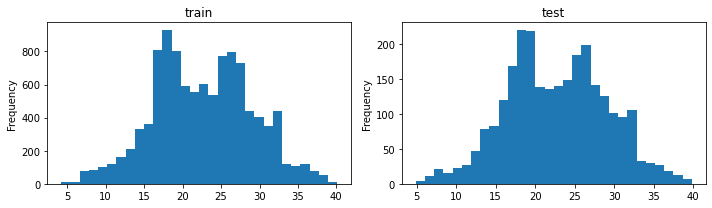

In [24]:
plt.figure(figsize=(2*5, 3))
plt.subplot(1, 2, 1)
data_train["temperature"].plot(kind="hist", bins=30)
plt.title(f"train")
plt.subplot(1, 2, 2)
data_test["temperature"].plot(kind="hist", bins=30)
plt.title(f"test")
plt.tight_layout()
plt.show()

In [25]:
# 看你要用什麼模型再決定要不要做 Normalization
train_temperature_mean = data_train["temperature"].mean()
train_temperature_std = data_train["temperature"].std()

# data_train["temperature"] = (data_train["temperature"]-train_temperature_mean)/train_temperature_std
# data_test["temperature"] = (data_test["temperature"]-train_temperature_mean)/train_temperature_std

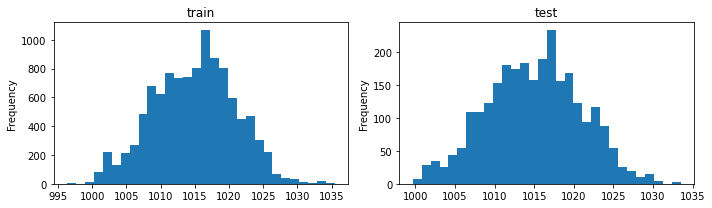

In [26]:
plt.figure(figsize=(2*5, 3))
plt.subplot(1, 2, 1)
data_train["pressure"].plot(kind="hist", bins=30)
plt.title(f"train")
plt.subplot(1, 2, 2)
data_test["pressure"].plot(kind="hist", bins=30)
plt.title(f"test")
plt.tight_layout()
plt.show()

In [27]:
# 看你要用什麼模型再決定要不要做 Normalization
train_pressure_mean = data_train["pressure"].mean()
train_pressure_std = data_train["pressure"].std()

# data_train["pressure"] = (data_train["pressure"]-train_pressure_mean)/train_pressure_std
# data_test["pressure"] = (data_test["pressure"]-train_pressure_mean)/train_pressure_std

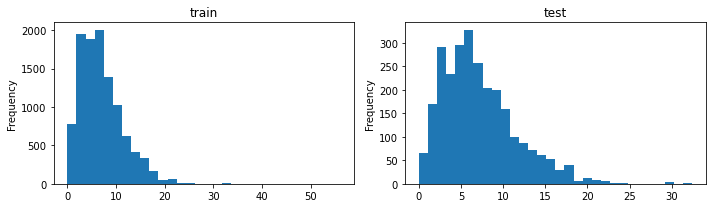

In [28]:
plt.figure(figsize=(2*5, 3))
plt.subplot(1, 2, 1)
data_train["windSpeed"].plot(kind="hist", bins=30)
plt.title(f"train")
plt.subplot(1, 2, 2)
data_test["windSpeed"].plot(kind="hist", bins=30)
plt.title(f"test")
plt.tight_layout()
plt.show()

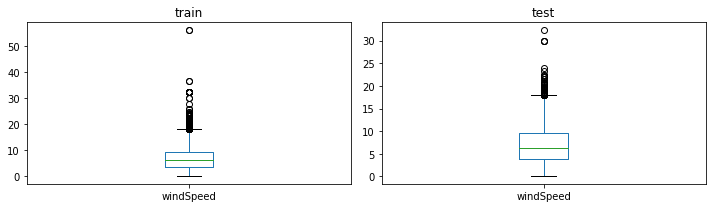

In [29]:
plt.figure(figsize=(2*5, 3))
plt.subplot(1, 2, 1)
data_train["windSpeed"].plot(kind="box")
plt.title(f"train")
plt.subplot(1, 2, 2)
data_test["windSpeed"].plot(kind="box")
plt.title(f"test")
plt.tight_layout()
plt.show()

In [30]:
# 方式有很多種
# 1. 分成 K-區段也可以
# 2. 上下兩段做 clip，再 normalize 之類的
# 3. 不過要做 tree-based 的話其實不用做太多處理

# way2.
train_q1 = data_train["windSpeed"].quantile(0.25)
train_q2 = data_train["windSpeed"].quantile(0.5)
train_q3 = data_train["windSpeed"].quantile(0.75)
train_r = train_q3-train_q1
low = max(data_train["windSpeed"].min(), train_q2 - 1.5 * train_r)
high = min(data_train["windSpeed"].max(), train_q2 + 1.5 * train_r)
print(low, high)

data_train.loc[data_train["windSpeed"]<low, "windSpeed"] = low
data_train.loc[data_train["windSpeed"]>high, "windSpeed"] = high

data_test.loc[data_test["windSpeed"]<low, "windSpeed"] = low
data_test.loc[data_test["windSpeed"]>high, "windSpeed"] = high

0.0 14.81625


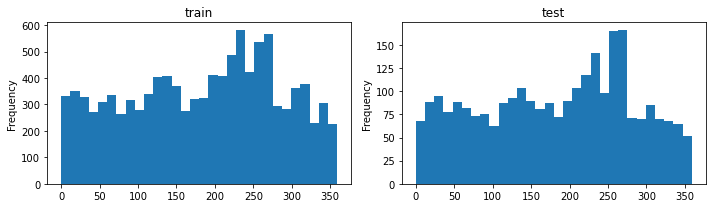

In [31]:
plt.figure(figsize=(2*5, 3))
plt.subplot(1, 2, 1)
data_train["windBearing"].plot(kind="hist", bins=30)
plt.title(f"train")
plt.subplot(1, 2, 2)
data_test["windBearing"].plot(kind="hist", bins=30)
plt.title(f"test")
plt.tight_layout()
plt.show()

In [32]:
# 看你要用什麼模型再決定要不要做 Normalization
train_windbearing_max = data_train["windBearing"].max()
train_windbearing_min = data_train["windBearing"].min()
train_windbearing_range = train_windbearing_max - train_windbearing_min

# data_train["windBearing"] = (data_train["windBearing"]-train_windbearing_min)/train_windbearing_range
# data_test["windBearing"] = (data_test["windBearing"]-train_windbearing_min)/train_windbearing_range

### 地理位置
- terrainType
- closeToWater
- city
- continent
---------------
- population_density
- urban
- suburban
- midurban
- rural
---------------
- gymDistanceKm
- gymIn100m
- gymIn250m
- gymIn500m
- gymIn1000m
- gymIn2500m
- gymIn5000m
---------------
- pokestopDistanceKm
- pokestopIn100m
- pokestopIn250m
- pokestopIn500m
- pokestopIn1000m
- pokestopIn2500m
- pokestopIn5000m

In [33]:
col_pok = ["gymDistanceKm", 'gymIn100m', 'gymIn250m', 'gymIn500m',
           'gymIn1000m', 'gymIn2500m', 'gymIn5000m']

print(data_train[col_pok].isnull().sum())
print(data_test[col_pok].isnull().sum())

gymDistanceKm    0
gymIn100m        0
gymIn250m        0
gymIn500m        0
gymIn1000m       0
gymIn2500m       0
gymIn5000m       0
dtype: int64
gymDistanceKm    0
gymIn100m        0
gymIn250m        0
gymIn500m        0
gymIn1000m       0
gymIn2500m       0
gymIn5000m       0
dtype: int64


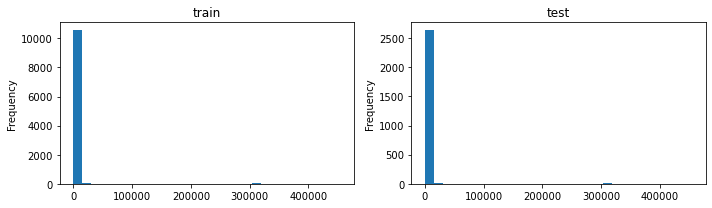

In [34]:
plt.figure(figsize=(2*5, 3))
plt.subplot(1, 2, 1)
(data_train["gymDistanceKm"]*1000).plot(kind="hist", bins=30)
plt.title(f"train")
plt.subplot(1, 2, 2)
(data_test["gymDistanceKm"]*1000).plot(kind="hist", bins=30)
plt.title(f"test")
plt.tight_layout()
plt.show()

In [35]:
data_train['>gymIn5000m'] = ((data_train["gymDistanceKm"])>5).astype(np.int_)
data_test['>gymIn5000m'] = ((data_test["gymDistanceKm"])>5).astype(np.int_)

# data_train['gymDistanceKm'] = data_train.drop(["gymDistanceKm"], axis=1)
# data_test['gymDistanceKm'] = data_test.drop(["gymDistanceKm"], axis=1)

In [36]:
col_pok = ["pokestopDistanceKm", 'pokestopIn100m', 'pokestopIn250m', 'pokestopIn500m',
           'pokestopIn1000m', 'pokestopIn2500m', 'pokestopIn5000m']

print(data_train[col_pok].isnull().sum())
print(data_test[col_pok].isnull().sum())

pokestopDistanceKm    0
pokestopIn100m        0
pokestopIn250m        0
pokestopIn500m        0
pokestopIn1000m       0
pokestopIn2500m       0
pokestopIn5000m       0
dtype: int64
pokestopDistanceKm    0
pokestopIn100m        0
pokestopIn250m        0
pokestopIn500m        0
pokestopIn1000m       0
pokestopIn2500m       0
pokestopIn5000m       0
dtype: int64


In [37]:
# data_train[col_pok] = data_train[col_pok].astype(np.float32)

In [38]:
data_train["pokestopDistanceKm"].loc[data_train["pokestopDistanceKm"]=="?"]

728     ?
5238    ?
7680    ?
Name: pokestopDistanceKm, dtype: object

In [39]:
data_test["pokestopDistanceKm"].loc[data_test["pokestopDistanceKm"]=="?"]

2628    ?
Name: pokestopDistanceKm, dtype: object

In [40]:
ind = np.ones(data_train.shape[0], np.int_)
ind[[728, 5238, 7680]] = 0
# 找出和 728, 5238, 7680 一樣都是 False 的人，取平均，把問號替換成平均值
miss_mean = data_train.loc[ind>0].loc[data_train.loc[ind>0, col_pok].sum(1)==0, "pokestopDistanceKm"].astype(np.float_).mean()
data_train.loc[[728, 5238, 7680], "pokestopDistanceKm"] = miss_mean
data_test.loc[[2628], "pokestopDistanceKm"] = miss_mean

In [41]:
data_train["pokestopDistanceKm"] = data_train["pokestopDistanceKm"].astype(np.float_)
data_test["pokestopDistanceKm"] = data_test["pokestopDistanceKm"].astype(np.float_)

In [42]:
data_train['>pokestopIn5000m'] = ((data_train["pokestopDistanceKm"])>5).astype(np.int_)
data_test['>pokestopIn5000m'] = ((data_test["pokestopDistanceKm"])>5).astype(np.int_)

# data_train['pokestopDistanceKm'] = data_train.drop(["pokestopDistanceKm"], axis=1)
# data_test['pokestopDistanceKm'] = data_test.drop(["pokestopDistanceKm"], axis=1)

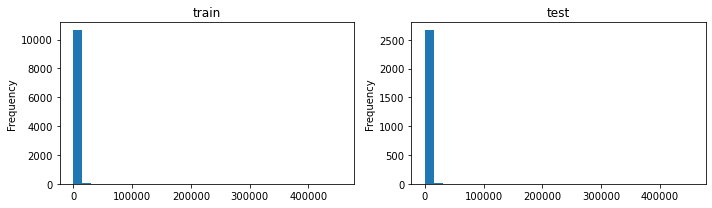

In [43]:
plt.figure(figsize=(2*5, 3))
plt.subplot(1, 2, 1)
(data_train["pokestopDistanceKm"]*1000).plot(kind="hist", bins=30)
plt.title(f"train")
plt.subplot(1, 2, 2)
(data_test["pokestopDistanceKm"]*1000).plot(kind="hist", bins=30)
plt.title(f"test")
plt.tight_layout()
plt.show()

0
0


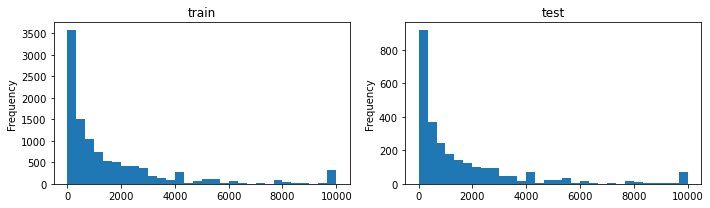

In [44]:
print(data_train["population_density"].isnull().sum())
print(data_test["population_density"].isnull().sum())

plt.figure(figsize=(2*5, 3))
plt.subplot(1, 2, 1)
data_train["population_density"].plot(kind="hist", bins=30)
plt.title(f"train")
plt.subplot(1, 2, 2)
data_test["population_density"].plot(kind="hist", bins=30)
plt.title(f"test")
plt.tight_layout()
plt.show()

In [45]:
set(data_test["terrainType"].unique())-set(data_train["terrainType"].unique())

set()

In [46]:
set(data_train["terrainType"].unique())-set(data_test["terrainType"].unique())

{11}

In [47]:
data_train["type"] = 0
data_test["type"] = 1
data = pd.concat([data_train, data_test], sort=False)
data = data.reset_index(drop=True)

col_name = "terrainType"
col_one_hot = pd.get_dummies(data[col_name], prefix=col_name)

data = data.join(col_one_hot)
data = data.drop(col_name, axis=1)

data_train = data.loc[data["type"]==0].copy()
data_test = data.loc[data["type"]==1].copy()
data_test = data_test.reset_index(drop=True)

In [48]:
data_train["continent"].value_counts()

America              5965
Europe               3812
Asia                  656
Australia             122
America/Argentina      68
Pacific                57
America/Indiana        19
Africa                 13
America/Kentucky        1
Atlantic                1
Name: continent, dtype: int64

In [49]:
data_test["continent"].value_counts()

America              1477
Europe                945
Asia                  180
Australia              37
Pacific                17
America/Argentina      15
Africa                  6
America/Indiana         4
Name: continent, dtype: int64

In [50]:
data_train["continent"] = data_train["continent"].apply(lambda x: x.split("/")[0])
data_test["continent"] = data_test["continent"].apply(lambda x: x.split("/")[0])

In [51]:
data_train["continent"].value_counts()

America      6053
Europe       3812
Asia          656
Australia     122
Pacific        57
Africa         13
Atlantic        1
Name: continent, dtype: int64

In [52]:
data_test["continent"].value_counts()

America      1496
Europe        945
Asia          180
Australia      37
Pacific        17
Africa          6
Name: continent, dtype: int64

In [53]:
data_train["type"] = 0
data_test["type"] = 1
data = pd.concat([data_train, data_test], sort=False)
data = data.reset_index(drop=True)

col_name = "continent"
col_one_hot = pd.get_dummies(data[col_name], prefix=col_name)

data = data.join(col_one_hot)
data = data.drop(col_name, axis=1)

data_train = data.loc[data["type"]==0].copy()
data_test = data.loc[data["type"]==1].copy()
data_test = data_test.reset_index(drop=True)

In [54]:
set(data_train["city"].unique())-set(data_test["city"].unique())

{'Bahia',
 'Bogota',
 'Bratislava',
 'Brussels',
 'Halifax',
 'Isle_of_Man',
 'Istanbul',
 'Karachi',
 'Kiev',
 'Louisville',
 'Luxembourg',
 'Phnom_Penh',
 'Reykjavik'}

In [55]:
set(data_test["city"].unique())-set(data_train["city"].unique())

{'Amman', 'Montreal', 'Noumea'}

In [56]:
print((data_test["city"]=='Amman').sum())
print((data_test["city"]=='Montreal').sum())
print((data_test["city"]=='Noumea').sum())

1
2
1


In [57]:
city_temperature = {city: T for city, T in data_train.groupby("city")["temperature"].mean().items()}

In [58]:
numpy_temperature = np.array(list(city_temperature.values()))
keys_temperature = list(city_temperature.keys())
print(np.abs(numpy_temperature-data_test.loc[data_test["city"]=='Amman', "temperature"].values).argmin())
print(keys_temperature[46])
data_test.loc[data_test["city"]=='Amman', "city"] = keys_temperature[46]

46
Manila


In [59]:
print(np.abs(numpy_temperature-data_test.loc[data_test["city"]=='Montreal', "temperature"].values[0]).argmin())
print(np.abs(numpy_temperature-data_test.loc[data_test["city"]=='Montreal', "temperature"].values[1]).argmin())
print(keys_temperature[18], keys_temperature[41])
data_test.loc[data_test["city"]=='Montreal', "city"] = np.array([keys_temperature[18], keys_temperature[41]])

18
41
Detroit Los_Angeles


In [60]:
print(np.abs(numpy_temperature-data_test.loc[data_test["city"]=='Noumea', "temperature"].values[0]).argmin())
print(keys_temperature[52])
data_test.loc[data_test["city"]=='Noumea', "city"] = keys_temperature[52]

52
Paris


In [61]:
set(data_test["city"].unique())-set(data_train["city"].unique())

set()

In [62]:
data_train["type"] = 0
data_test["type"] = 1
data = pd.concat([data_train, data_test], sort=False)
data = data.reset_index(drop=True)

col_name = "city"
col_one_hot = pd.get_dummies(data[col_name], prefix=col_name)

data = data.join(col_one_hot)
data = data.drop(col_name, axis=1)

data_train = data.loc[data["type"]==0].copy()
data_test = data.loc[data["type"]==1].copy()
data_test = data_test.reset_index(drop=True)

In [63]:
data_train.shape, data_test.shape

((10714, 305), (2681, 305))

In [64]:
data_test['class'].isnull().sum()

2681

In [65]:
data_test = data_test.drop("class", axis=1)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
data_train, data_valid = train_test_split(data_train,
                                          test_size=0.2,
                                          random_state=3,
                                          stratify=data_train["class"])

In [68]:
y_train = data_train["class"].copy()
x_train = data_train.drop(["class", "_id"], axis=1)

y_valid = data_valid["class"].copy()
x_valid = data_valid.drop(["class", "_id"], axis=1)

In [69]:
from sklearn.ensemble import RandomForestClassifier
# 計算分類正確率
from sklearn.metrics import accuracy_score, confusion_matrix

In [70]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [71]:
feature_col = x_train.columns
print(feature_col)

Index(['appearedHour', 'appearedMinute', 'closeToWater', 'temperature',
       'windSpeed', 'windBearing', 'pressure', 'population_density', 'urban',
       'suburban',
       ...
       'city_Toronto', 'city_Tripoli', 'city_Tunis', 'city_Vancouver',
       'city_Vienna', 'city_Vilnius', 'city_Warsaw', 'city_Winnipeg',
       'city_Zagreb', 'city_Zurich'],
      dtype='object', length=303)


In [72]:
y_pred_prob = clf.predict_proba(data_valid[feature_col])
y_pred = clf.predict(data_valid[feature_col])

In [73]:
y_pred

array([4., 3., 1., ..., 3., 5., 4.])

In [74]:
accuracy_score(y_valid, y_pred)

0.5459636024265049

In [75]:
confusion_matrix(y_valid, y_pred)

array([[ 99,   7,   4,  43, 107,  20],
       [ 13, 102,   7, 128,  20,  16],
       [  3,   0, 125,  32,   4,   8],
       [ 14,  73,  23, 419,  11,  83],
       [ 67,  12,  15,  59, 201,  41],
       [  4,  20,  11, 117,  11, 224]], dtype=int64)

## 請大家把答案換成填至 Sample_Submission.csv 中

In [76]:
y_pred_prob = clf.predict_proba(data_test[feature_col])
y_pred = clf.predict(data_test[feature_col])

In [78]:
submit = pd.read_csv("sample_submission.csv", index_col=False)

In [79]:
np.array_equal(submit["_id"], data_test["_id"])

True

In [80]:
# 保險一點
data_test["class"] = y_pred.astype(np.int_)
submit.loc[:, "class"] = data_test.loc[submit.index, "class"] 

In [81]:
submit.head()

,_id,class
0,a2dc6126-2f0e-48a7-9b56-49fe7c5ce6dc,0
1,916a8d4f-a15c-4b50-ac5c-d0952ae21a0e,0
2,cda96dfd-5cfe-44a6-9f76-74673fb6de9b,1
3,52889c38-1090-4659-969f-d2e96cd67b7f,4
4,29511cfa-c553-4561-a799-098a7352fd49,1


In [82]:
submit.to_csv("groot_baseline_v1.csv", index=False)